In [1]:
#Import Necessary Libraries

# NumPy: For mathematical funcations, array, matrices operations
import numpy as np 

# Graph: Plotting graphs and other visula tools
import pandas as pd
import seaborn as sns

sns.set_palette("muted")

# color_palette = sns.color_palette()
# To enable inline plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Import CSV data using pandas data frame
df_original = pd.read_csv('bank.csv')

# Prepare columns names
df_columns = []
for column in df_original.columns:
    df_columns.append(column)

# Prepare mapping of column names for quick access
df_columns_map = {}
map_index: int = 0
for column in df_columns:
    df_columns_map[map_index] = column
    map_index = map_index + 1
    
print("Columns {}".format(df_columns))
print("***********************************************************************************************************************")
print("Columns Map {}".format(df_columns_map))

# We have separated out columns and its mapping from data, at any point of time during data analysis or cleaning we 
# can directly refer or get data from either index or column identifier

# See data overview

df_original.head()

Columns ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
***********************************************************************************************************************
Columns Map {0: 'ID', 1: 'Age', 2: 'Experience', 3: 'Income', 4: 'ZIP Code', 5: 'Family', 6: 'CCAvg', 7: 'Education', 8: 'Mortgage', 9: 'Personal Loan', 10: 'Securities Account', 11: 'CD Account', 12: 'Online', 13: 'CreditCard'}


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [3]:
# Lets analyse data based on following conditions
# 1. Check whether all rows x colums are loaded as given in question, all data must match before we start to even operate on it.
# 2. Print shape of the data
# 8. Check data types of each field
# 3. Find presence of null or missing values.
# 4. Visually inspect data and check presense of Outliers if there are any and see are 
#    they enough to drop or need to consider during model building
# 5. Print shape of the data
# 6. Do we need to consider all data columns given in data set for model building
# 7. Find Corr, median, mean, std deviation, min, max for columns.

# Below is info for our data

df_original.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
# 1. Check whether all rows x colums are loaded as given in question, all data must match before we start to even operate on it.

#df_original.describe() difficult to view hence lets apply transpose() to visually see it better

df_original.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

### Data Analysis Column Wise

* ID: seems just a identity representation of row or an item in a data frame, this can be dropped when processing model.
* Age: based on std, q1, q2, q3 seems valid values.
* **Experience**: Look at min, it say *-3 experience* cannot be in negative and this particular needs correction. Ideal values should be 0-80 considering a person started to work at 20 years and lives for max 100 years.
* ZipCode: All values seems fine. If we wish to discard region from the model still our model is not impacted if we drop this column. But at later stage we are predicting, people from which area are accepting more personal loans, then we may need to consider this field mandatorily.
* Family: Data looks ok and can play role like if children are less, then less responsibility and hence no need of loan, but more kids and then sometime people tend to go for extra loan apart from education as well. So this is very important field in model buulding.
* CreditCard: General human assumption i would do that, person who has creditcard is vrey unlikely to go for personal load. But if the need arises for a longer term some data points might be there who has credit card as well as personal loan.


Skipping some other fields which are self explanatory.


In [5]:
# From our given data set we have succesfully loaded all columns looking at the column labels
# Lets check shape of the data
df_original.shape

# Here we see total 5000 rows and 14 colums. 

(5000, 14)

In [6]:
# sns.boxplot(y="Age", orient="v", x="Personal Loan", hue="Education", data=df_original)

In [7]:
# Data types of fields

df_original.dtypes

# We see that everything is numeric data and need not need any conversion

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
# Presence of null values or missing values
df_original.isnull().values.any()

# This tell us that we have for each row x column.


False

Check validity for data, as we have seen, there is no missing data in out data frame, but are the values 
valid enough like we have seen that experience field has -3 having experience as -3 doesnt add any value to our model
but it may impact our final consideration, this also depends on how many such values are present.
Lets print column colmposition or categories spread of data for suspicious column.


 

In [9]:
# Lets see what are experience range in our data set we have.

print("Experience has unique data in this range {}".format(df_original["Experience"].unique().tolist()))

# len(df_original[df_original["Experience"] < 0]['Experience'].unique().tolist())
df_experience = df_original[df_original['Experience'] < 0]
df_experience['Experience'].value_counts()

# So there are 52 values whose experience is a missing value which constitute ~1 % of data for experience column
# We have few options to deal with this
# - purge this invalid data
# - Replace it with meaning full

Experience has unique data in this range [1, 19, 15, 9, 8, 13, 27, 24, 10, 39, 5, 23, 32, 41, 30, 14, 18, 21, 28, 31, 11, 16, 20, 35, 6, 25, 7, 12, 26, 37, 17, 2, 36, 29, 3, 22, -1, 34, 0, 38, 40, 33, 4, -2, 42, -3, 43]


-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [10]:
# Lets quickly check Age

print("Age experience has unique data in this range {}".format(df_original['Age'].unique().tolist()))
# This looks ok.

#Values count
df_original['Age'].value_counts()

# There are no suspicious values

Age experience has unique data in this range [25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46, 55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62, 58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23]


35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

We are able to view visually since values are in thousands range what if it is lakhs. It is not feasible of even a good approach to manually check terminal and see if we have invalid values. In that case we can try to parse the values in fields.
Create a helper method for string, bool, int and other data types. Signature might look like this:


```python
def all_int(self, column_int_values_list):
    # Iterate over list parsing values
```

Lets try to check validity of values using parse approach.

In [11]:
# Validate function

def validate_column(column_as_list, column_name):
    print("Analysing {} column for unique value {}".format(column_name, column_as_list))
    for value in df_original['Age'].tolist():
        try:
            value += 1
        except TypeError:
            print("Error identyfying {} in {} column ".format(value, column_name) )
            return False
    return True       
            

In [12]:
print("Is Age column valid {}".format(validate_column(df_original['Age'].unique().tolist(), 'Age')))

Analysing Age column for unique value [25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46, 55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62, 58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23]
Is Age column valid True


In [13]:
print("Is Experience column valid {}".format(validate_column(df_original['Experience'].unique().tolist(), 'Experience')))

Analysing Experience column for unique value [1, 19, 15, 9, 8, 13, 27, 24, 10, 39, 5, 23, 32, 41, 30, 14, 18, 21, 28, 31, 11, 16, 20, 35, 6, 25, 7, 12, 26, 37, 17, 2, 36, 29, 3, 22, -1, 34, 0, 38, 40, 33, 4, -2, 42, -3, 43]
Is Experience column valid True


In [14]:
print("Is Income column valid {}".format(validate_column(df_original['Income'].unique().tolist(), 'Income')))

Analysing Income column for unique value [49, 34, 11, 100, 45, 29, 72, 22, 81, 180, 105, 114, 40, 112, 130, 193, 21, 25, 63, 62, 43, 152, 83, 158, 48, 119, 35, 41, 18, 50, 121, 71, 141, 80, 84, 60, 132, 104, 52, 194, 8, 131, 190, 44, 139, 93, 188, 39, 125, 32, 20, 115, 69, 85, 135, 12, 133, 19, 82, 109, 42, 78, 51, 113, 118, 64, 161, 94, 15, 74, 30, 38, 9, 92, 61, 73, 70, 149, 98, 128, 31, 58, 54, 124, 163, 24, 79, 134, 23, 13, 138, 171, 168, 65, 10, 148, 159, 169, 144, 165, 59, 68, 91, 172, 55, 155, 53, 89, 28, 75, 170, 120, 99, 111, 33, 129, 122, 150, 195, 110, 101, 191, 140, 153, 173, 174, 90, 179, 145, 200, 183, 182, 88, 160, 205, 164, 14, 175, 103, 108, 185, 204, 154, 102, 192, 202, 162, 142, 95, 184, 181, 143, 123, 178, 198, 201, 203, 189, 151, 199, 224, 218]
Is Income column valid True


In [15]:
print("Is ZIP Code colum valid {}".format(validate_column(df_original['ZIP Code'].unique().tolist(), 'ZIP Code')))

Analysing ZIP Code column for unique value [91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023, 94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604, 94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117, 94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019, 95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245, 95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123, 90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305, 95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612, 95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037, 95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833, 94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720, 90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423, 93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053, 90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503, 93111, 94132, 95818, 91942, 90401, 93524, 95133, 92173, 94043, 92521, 9212

In [16]:
print("Is Family colum valid {}".format(validate_column(df_original['Family'].unique().tolist(), 'Family')))

Analysing Family column for unique value [4, 3, 1, 2]
Is Family colum valid True


In [17]:
print("Is CCAvg colum valid {}".format(validate_column(df_original['CCAvg'].unique().tolist(), 'CCAvg')))

Analysing CCAvg column for unique value [1.6, 1.5, 1.0, 2.7, 0.4, 0.3, 0.6, 8.9, 2.4, 0.1, 3.8, 2.5, 2.0, 4.7, 8.1, 0.5, 0.9, 1.2, 0.7, 3.9, 0.2, 2.2, 3.3, 1.8, 2.9, 1.4, 5.0, 2.3, 1.1, 5.7, 4.5, 2.1, 8.0, 1.7, 0.0, 2.8, 3.5, 4.0, 2.6, 1.3, 5.6, 5.2, 3.0, 4.6, 3.6, 7.2, 1.75, 7.4, 2.67, 7.5, 6.5, 7.8, 7.9, 4.1, 1.9, 4.3, 6.8, 5.1, 3.1, 0.8, 3.7, 6.2, 0.75, 2.33, 4.9, 0.67, 3.2, 5.5, 6.9, 4.33, 7.3, 4.2, 4.4, 6.1, 6.33, 6.6, 5.3, 3.4, 7.0, 6.3, 8.3, 6.0, 1.67, 8.6, 7.6, 6.4, 10.0, 5.9, 5.4, 8.8, 1.33, 9.0, 6.7, 4.25, 6.67, 5.8, 4.8, 3.25, 5.67, 8.5, 4.75, 4.67, 3.67, 8.2, 3.33, 5.33, 9.3, 2.75]
Is CCAvg colum valid True


In [18]:
print("Is Education colum valid {}".format(validate_column(df_original['Education'].unique().tolist(), 'Education')))

Analysing Education column for unique value [1, 2, 3]
Is Education colum valid True


In [19]:
print("Is Mortgage colum valid {}".format(validate_column(df_original['Mortgage'].unique().tolist(), 'Mortgage')))

Analysing Mortgage column for unique value [0, 155, 104, 134, 111, 260, 163, 159, 97, 122, 193, 198, 285, 412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236, 166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135, 244, 164, 81, 315, 140, 95, 89, 90, 105, 100, 282, 209, 249, 91, 98, 145, 150, 169, 280, 99, 78, 264, 113, 117, 325, 121, 138, 77, 158, 109, 131, 391, 88, 129, 196, 617, 123, 167, 190, 248, 82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220, 133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156, 547, 470, 304, 221, 108, 179, 271, 378, 176, 76, 314, 87, 203, 180, 230, 137, 152, 485, 300, 272, 144, 94, 208, 275, 83, 218, 327, 322, 205, 227, 239, 85, 160, 364, 449, 75, 107, 92, 187, 355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305, 372, 79, 301, 232, 289, 212, 250, 84, 130, 303, 256, 259, 204, 524, 157, 231, 287, 247, 333, 229, 357, 361, 294, 86, 329, 142, 184, 442, 233, 215, 394, 475, 197, 228, 297, 128, 241, 437, 178, 428, 

In [20]:
print("Is Securities Account colum valid {}".format(validate_column(df_original['Securities Account'].unique().tolist(), 'Securities Account')))

Analysing Securities Account column for unique value [1, 0]
Is Securities Account colum valid True


In [21]:
print("Is CD Account colum valid {}".format(validate_column(df_original['CD Account'].unique().tolist(), 'CD Account')))

Analysing CD Account column for unique value [0, 1]
Is CD Account colum valid True


In [22]:
print("Is Online colum valid {}".format(validate_column(df_original['Online'].unique().tolist(), 'Online')))

Analysing Online column for unique value [0, 1]
Is Online colum valid True


In [23]:
print("Is CreditCard colum valid {}".format(validate_column(df_original['CreditCard'].unique().tolist(), 'CreditCard')))

Analysing CreditCard column for unique value [0, 1]
Is CreditCard colum valid True


In [24]:

print("Is Personal Loan colum valid {}".format(validate_column(df_original['Personal Loan'].unique().tolist(), 'Personal Loan')))

Analysing Personal Loan column for unique value [0, 1]
Is Personal Loan colum valid True


Lets Visually inspect distribution of values across each column and check presence of outlier

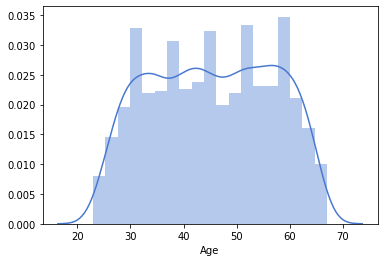

In [25]:
# Age
sns.distplot(df_original['Age'],kde=True)
# Here we conclude that data set is captured for a wide range of age group

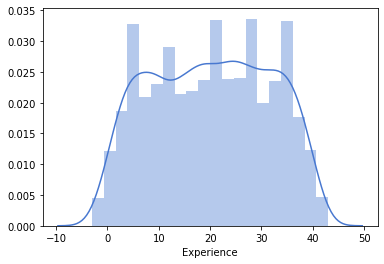

In [26]:
# Experience
sns.distplot(df_original['Experience'],kde=True)

#Again here wide range of experience levels

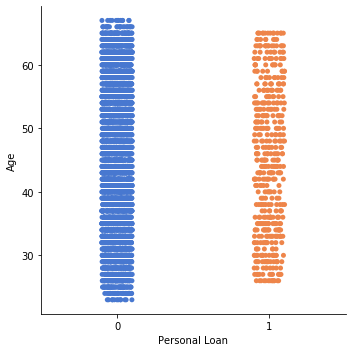

In [27]:
#Lets Analyse which relation between age and personal load

sns.catplot(y='Age', x='Personal Loan', data=df_original)
# Except that 0 is more denser than 1 there is no enough visual reference that who would take more loan from this relationship

['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


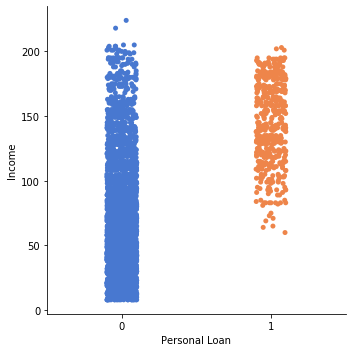

In [28]:
# Lets try income vs loan
sns.catplot(y='Income', x='Personal Loan', data=df_original)
# Quite evident, people whose Income is between 100 and 200 tend to take loan more compared to ones present in lower income.
# SO field relation to income has proven to have good influence on personal loan, lets see what else fields we have relation to
print(df_columns)

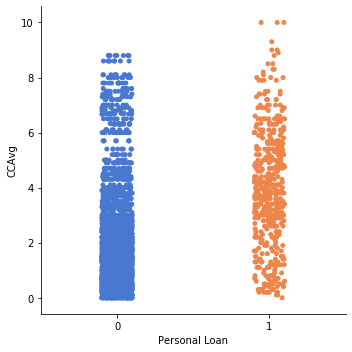

In [29]:
sns.catplot(y='CCAvg', x='Personal Loan', data=df_original)
# People whose credit card average is between 2 - 6 seems to have more personal loans 
# that other range as seen from graph below

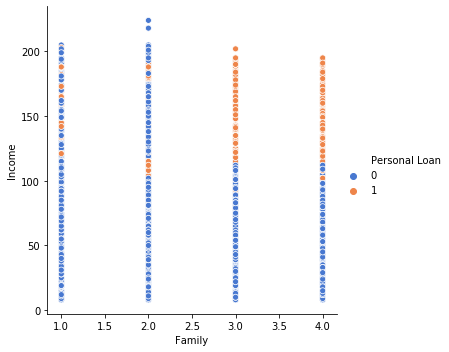

In [30]:
# One more column we have in our dataset which doesnt corresponds to any income values but is the one which affect it
# Family can we say that people where more family members are present have takne personal loan
# sns.relplot(x='Personal Loan', y='Family', data=df_original, fit_reg=False)
sns.relplot(x="Family", y="Income",hue="Personal Loan", data=df_original);

# We can conclude from this graph that, people who have 3 or 4 family members and whose income is above ~100 to ~200 tend to opt
# for personal loan more than a different ranges as observed from graph.


In [31]:
# Little More exploration using categorical columns
pd.crosstab(df_original['Personal Loan'],df_original['Family'])

Family            1     2    3     4
Personal Loan                       
0              1365  1190  877  1088
1               107   106  133   134

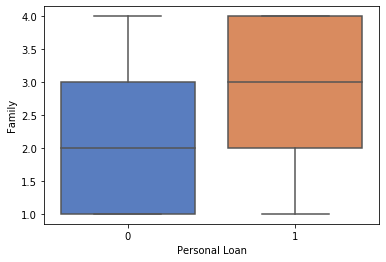

In [32]:
#Box Plot family and personal loan coparison
sns.boxplot(y="Family", orient="v", x="Personal Loan", data=df_original)
# People are from 3-4 most probably these are people, having 1 more children seems to have opeted for personal loan

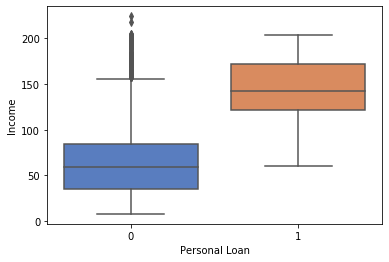

In [33]:
#Income and Personal Loan
sns.boxplot(y="Income", orient="v", x="Personal Loan", data=df_original)

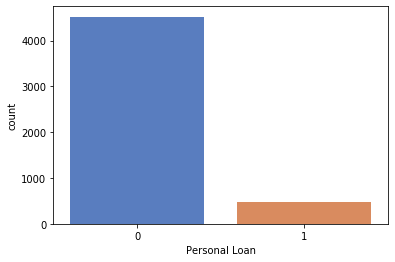

In [34]:
# Lets Analyse using count plot
sns.countplot(x='Personal Loan',data=df_original)
# Even though we have established alot ot relationship between family, age, income, ccavg, income and decided to go further.
# But the content of our data seem insufficient, we have very few cases of People who have opted for personal loan and
# More cases of people who have rejected personal loan offer from bank. This imbalance sometimes can affect in model building
# But in our case this is acceptable, because in real life people who take pl would be less.

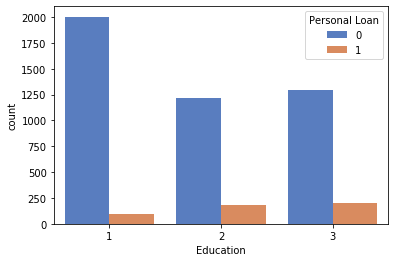

In [35]:
sns.countplot(x='Education', hue='Personal Loan',data=df_original)
# From Graph it is evident 3 > 2 >1 where
# 3: Working, 2: Graduates, 1: Under Graduates

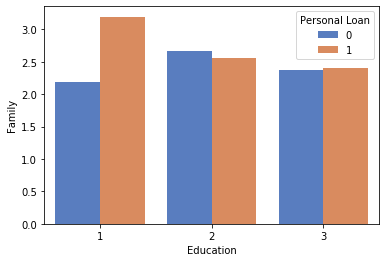

In [36]:
# Relation between Family& Education to personal load
sns.barplot('Education','Family',hue='Personal Loan',data=df_original,ci=None)


In [37]:
# Classes for all model goes here
# 1. Class Logistic
# 2. Class Knn
# 3. Class NaiveBayes


In [38]:
# Remember df_main_x will be our main dataframe to be operted on df_original is the unmodified loaded data set which is pure :)
# seperate data i.e input columns and to be predicted column
# Drop 'Personal Loan' from dataframe as this is dependent variable and copy it alone in y dataframe

df_main_x = df_original[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 
                       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 
                       'CreditCard']]

# Replace all -ve values in experience column to 0

# df_main_x.Experience[df_main_x.Experience.lt(0)] = 0 

# df_main_x['Experience'] = df_main_x['Experience'].map(lambda value: value if value >=0 else 0)

df_main_x.loc[df_main_x['Experience']<0, 'Experience']=0 


print("Experience values unique {}".format(validate_column(df_main_x['Experience'].unique().tolist(), 'Experience')))

df_main_y = df_original['Personal Loan']


# Also remember how we removed ID column as it is just a row counter

df_main_x.describe().T

# Now e see that there is no -ve value in experience columns


Analysing Experience column for unique value [1, 19, 15, 9, 8, 13, 27, 24, 10, 39, 5, 23, 32, 41, 30, 14, 18, 21, 28, 31, 11, 16, 20, 35, 6, 25, 7, 12, 26, 37, 17, 2, 36, 29, 3, 22, 0, 34, 38, 40, 33, 4, 42, 43]
Experience values unique True


/home/ashish/installed_apps/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


count          mean          std     min      25%  \
Age                 5000.0     45.338400    11.463166    23.0     35.0   
Experience          5000.0     20.119600    11.440484     0.0     10.0   
Income              5000.0     73.774200    46.033729     8.0     39.0   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.0   
Family              5000.0      2.396400     1.147663     1.0      1.0   
CCAvg               5000.0      1.937938     1.747659     0.0      0.7   
Education           5000.0      1.881000     0.839869     1.0      1.0   
Mortgage            5000.0     56.498800   101.713802     0.0      0.0   
Securities Account  5000.0      0.104400     0.305809     0.0      0.0   
CD Account          5000.0      0.060400     0.238250     0.0      0.0   
Online              5000.0      0.596800     0.490589     0.0      0.0   
CreditCard          5000.0      0.294000     0.455637     0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIP Code            93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Securities Account      0.0      0.0      1.0  
CD Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

In [39]:
# X data frame
df_main_x.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   
4   35           8      45     91330       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [40]:
# Y Data Frame
df_main_y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [41]:
# Training constants and general imports

from math import sqrt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report

# taking 70:30 training and test set
test_size = 0.30 

# Random number seeding for reapeatability of the code
seed = 29 # My BirthDate :)

def isqrt(n):
    x = n
    y = (x + 1) // 2
    while y < x:
        x = y
        y = (x + n // x) // 2
    return x

# Logistic Regression

## Training General

In [42]:
# Why are we doing Logistic Regression, because in linear regression response of the system in continuous, where as in 
# logistic regression it is just limited number of possible outcomes i.e in our case [0] or [1] which is whethere a person 
# is likely to take loan or not [yes] or [no]

# Class LogisticRegressionProcess
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_main_x, df_main_y, test_size=test_size, random_state=seed)        


## Predicting Logistic Regression

In [43]:

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

lr_predict = lr_model.predict(X_test)

lr_score = lr_model.score(X_test, y_test)


## Evaluating Logistic Regression

In [44]:
print("Model Score")
print(lr_score)
print("Model confusion matrix")
print(metrics.confusion_matrix(y_test, lr_predict))


print(classification_report(y_test,lr_predict))

Model Score
0.9053333333333333
Model confusion matrix
[[1314   49]
 [  93   44]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1363
           1       0.47      0.32      0.38       137

    accuracy                           0.91      1500
   macro avg       0.70      0.64      0.67      1500
weighted avg       0.89      0.91      0.90      1500



# Naive Bayes

## Predicting Naive Bayes

In [45]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_nb_predict = nb_model.predict(X_test)

nb_score = nb_model.score(X_test, y_test)

## Evaluating Naive Bayes

In [46]:
print("Model Score")
print(nb_score)
print("Model confusion matrix")
print(metrics.confusion_matrix(y_test, y_nb_predict))


print(classification_report(y_test,y_nb_predict))


Model Score
0.876
Model confusion matrix
[[1240  123]
 [  63   74]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1363
           1       0.38      0.54      0.44       137

    accuracy                           0.88      1500
   macro avg       0.66      0.72      0.69      1500
weighted avg       0.90      0.88      0.89      1500



# K-NN

## Predicting K-NN

In [47]:
knn_predict = 0
knn_score = 0
knn_value = 0
# We have total 5000 taging 
print(isqrt(df_main_x.shape[0]))
for i in range(isqrt(df_main_x.shape[0])):
    kvalue = i+1
    knn_model = KNeighborsClassifier(n_neighbors=kvalue)
    knn_model.fit(X_train, y_train)
    new_knn_predict = knn_model.predict(X_test)
    new_knn_score = knn_model.score(X_test, y_test)
    if new_knn_score >= knn_score:
        knn_score = new_knn_score
        knn_predict = new_knn_predict
        knn_value = kvalue

print("Knn evaluation completed, best value is {}".format(knn_value))

70
Knn evaluation completed, best value is 28


## Evaluating K-NN

In [48]:
print("Model Score")
print(knn_score)
print("Model confusion matrix")
print(metrics.confusion_matrix(y_test, knn_predict))


print(classification_report(y_test,knn_predict))


Model Score
0.9106666666666666
Model confusion matrix
[[1360    3]
 [ 131    6]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1363
           1       0.67      0.04      0.08       137

    accuracy                           0.91      1500
   macro avg       0.79      0.52      0.52      1500
weighted avg       0.89      0.91      0.87      1500



## Analysis Result

In [49]:


results = {'Logistic Regression': lr_score, 'Naive Bayes': nb_score, 'K-NN': knn_score}

print("Model score are ")
print(results)

best_score = max(results, key=results.get);

print("Best score is for {} with accuracy {} ".format(best_score, results[best_score]))

if best_score == 'K-NN':
    print(' with kvalue {}'.format(kvalue))


Model score are 
{'Logistic Regression': 0.9053333333333333, 'Naive Bayes': 0.876, 'K-NN': 0.9106666666666666}
Best score is for K-NN with accuracy 0.9106666666666666 
 with kvalue 70


## Analysis Report

Our main aim was to find out people who would accept personal loan based on given data.

From the output we see that K-NN turned out to be the best model with accuracy of 0.91. The other nearest accuracy is 0.90 which is of Logistic Regression. For our use case by identifying the problem state and given the option we had we can consider Logistic Regression to be the best approach, as output to be predicted was 0/1 and that is what logistic regression does, it transforms its output using sigma function. Also,, Logis Regression is parameteric dependent algorithm where as K-NN is not. Theoretically K-NN is a little slower, as we have also seen that to find the best possible k value we had to iterate, this can impact as in our case it is dependent on input data size(row count).

So K-NN Would perform when there is no dependency on time constaints for finding out the best score, where as Logistic Regression would be the optimal choice for time constraints and when the target column is of binary predection asin this case.